In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [4]:
df = df.drop(columns = ["school", "classroom", "student_id"])
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [5]:
df["percent_change"] = ((df['posttest'] - df['pretest']) / df['posttest']) * 100
df.head(10)

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,percent_change
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,13.888889
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,16.455696
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0,20.779221
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474
5,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,74.0,10.810811
6,Urban,Non-public,Standard,20.0,Male,Does not qualify,63.0,75.0,16.000000
7,Urban,Non-public,Standard,20.0,Female,Does not qualify,63.0,72.0,12.500000
8,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,77.0,16.883117
9,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,72.0,15.277778


In [6]:
# add a blank column
df["High_Low_Growth"] = ''
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,percent_change,High_Low_Growth
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,13.888889,
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,16.455696,
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474,
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0,20.779221,
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474,


In [7]:
# apply a cut-off on percent change
def growth_rating(x):
    if x >= 15:
        result = "High Growth"
    else:
        result = "Low Growth"
    return result


df['High_Low_Growth'] = df['percent_change'].apply(growth_rating)
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,percent_change,High_Low_Growth
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,13.888889,Low Growth
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,16.455696,High Growth
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474,High Growth
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0,20.779221,High Growth
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474,High Growth


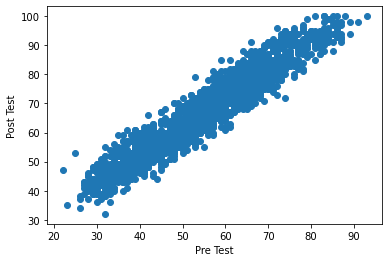

In [8]:
plt.scatter(df.pretest, df.posttest)
plt.xlabel('Pre Test')
plt.ylabel('Post Test')
plt.show()

In [9]:
X = df.drop(columns = ["High_Low_Growth", "percent_change"])
X = pd.get_dummies(X)

X.head()

,n_student,pretest,posttest,school_setting_Rural,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,72.0,0,0,1,1,0,0,1,1,0,1,0
1,20.0,66.0,79.0,0,0,1,1,0,0,1,1,0,1,0
2,20.0,64.0,76.0,0,0,1,1,0,0,1,0,1,1,0
3,20.0,61.0,77.0,0,0,1,1,0,0,1,1,0,1,0
4,20.0,64.0,76.0,0,0,1,1,0,0,1,0,1,1,0


In [10]:
X = df.pretest.values.reshape(-1,1)
y = df.posttest

model = LinearRegression()

model.fit(X,y)

LinearRegression()

In [11]:
y_pred = model.predict(X)
print(y_pred.shape)

(2133,)


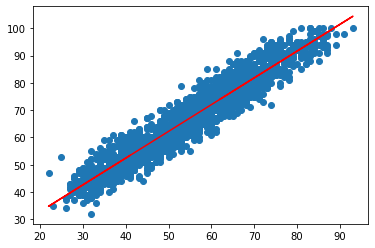

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
print(model.coef_)
print(model.intercept_)

[0.98058824]
13.213064144516053


 ...]

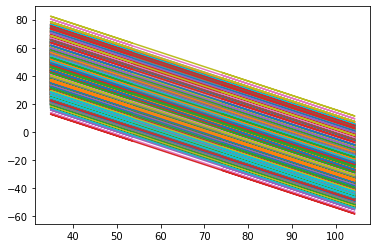

In [15]:
plt.plot(y_pred,(y_pred - X))